In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# 현재 디렉터리 위치 확인
!pwd

/content


# 1. 폴더 정리

* 제공해드린 animals10.zip의 압축을 풀어 그 내용을 살펴보시고, 폴더 구조를 학습에 알맞도록 재구성해주세요
* 특히 각 클래스마다 약 30% 정도의 이미지를 test 폴더에 할당해주세요
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요 (ex. flat_test[:5]로 앞의 다섯값 확인)
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

In [ ]:
# 이미 압축이 풀려있다면 삭제
# 새로 압축 풀어줘야 파일 엑세스가 빠름

# import shutil
# shutil.rmtree("/content/drive/MyDrive/Animal10")

In [2]:
### Guideline for convenience ###
# 압축 풀기

###*** 한 번만 실행하면 됨. (압축 풀려있으면 실행하지 않아도 됨)***###
%cd /content/drive/MyDrive
!unzip -qq "/content/drive/MyDrive/animals10.zip"

/content/drive/MyDrive


In [3]:
# 각 클래스별 파일 개수 확인 -> 변수로 해당 개수 저장
# Tip) 클래스가 10개이므로 각 클래스마다 똑같은 내용의 코드를 계속 써야할까요? 클래스 이름을 리스트로 저장해 for문을 돌리면서 코드를 재사용하는건 어떨까요?

import os

file_list=["butterfly","cat","chicken","cow","dog","elephant","horse","sheep","spider","squirrel"]

num=[]
for i in range(len(file_list)):
  num.append(len(os.listdir('/content/drive/MyDrive/Animals-10/{}'.format(file_list[i]))))

import pandas as pd
count = pd.DataFrame({"class" : file_list , "num_files" : num})
count = count.set_index("class")
count

,num_files
class,
butterfly,2112
cat,1668
chicken,3098
cow,1866
dog,4863
elephant,1446
horse,2623
sheep,1820
spider,4821


In [4]:
# test에 넣을 이미지 개수 계산
test_count = []
for i in range(0,len(file_list)):
  test_count.append(int(count["num_files"][i]*3/10))
test_count

[633, 500, 929, 559, 1458, 433, 786, 546, 1446, 558]

In [5]:
# train, test 폴더 경로 선언 & 만들기

import os.path
from os import path

# test & train 폴더 만들기
if path.exists('/content/drive/MyDrive/Animals-10/test') == False:
  os.mkdir('/content/drive/MyDrive/Animals-10/test')
if path.exists('/content/drive/MyDrive/Animals-10/train') == False:
  os.mkdir('/content/drive/MyDrive/Animals-10/train')

# test와 train 안에 10개의 동물 클래스 폴더 만들기
for i in range(len(file_list)):
  if path.exists('/content/drive/MyDrive/Animals-10/test/{}'.format(file_list[i])) == False:
    os.mkdir('/content/drive/MyDrive/Animals-10/test/{}'.format(file_list[i]))
  if path.exists('/content/drive/MyDrive/Animals-10/train/{}'.format(file_list[i])) == False:
    os.mkdir('/content/drive/MyDrive/Animals-10/train/{}'.format(file_list[i]))

In [6]:
# train, test 폴더로 이미지 split해서 알맞게 집어넣기

import shutil

for i in range(len(file_list)):
  source_folder = '/content/drive/MyDrive/Animals-10/{}/'.format(file_list[i])
  test_folder = '/content/drive/MyDrive/Animals-10/test/{}/'.format(file_list[i])
  train_folder = '/content/drive/MyDrive/Animals-10/train/{}/'.format(file_list[i])
  os.chdir('/content/drive/MyDrive/Animals-10/{}'.format(file_list[i]))
  files_to_test = os.listdir()[0:test_count[i]]
  files_to_train = os.listdir()[test_count[i]:]
  
  # iterate files
  for file in files_to_test:
    source = source_folder + file
    to_test = test_folder + file
    # move file
    shutil.copy(source, to_test)

  for file in files_to_train:
    source = source_folder + file
    to_train = train_folder + file
    # move file
    shutil.copy(source, to_train)

os.chdir('/content/drive/MyDrive/Animals-10/')

In [7]:
import os

num_all = []
num_train = []
num_test = []
for i in range(len(file_list)):
  num_all.append(len(os.listdir('/content/drive/MyDrive/Animals-10/{}'.format(file_list[i]))))
  num_train.append(len(os.listdir('/content/drive/MyDrive/Animals-10/train/{}'.format(file_list[i]))))
  num_test.append(len(os.listdir('/content/drive/MyDrive/Animals-10/test/{}'.format(file_list[i]))))

import pandas as pd
count_ = pd.DataFrame({'folder_name': file_list , "num_all" : num_all, "num_train" : num_train , "num_test" : num_test})
count_ = count_.set_index("folder_name")
count_

,num_all,num_train,num_test
folder_name,,,
butterfly,2112,1479,633
cat,1668,1168,500
chicken,3098,2169,929
cow,1866,1307,559
dog,4863,3405,1458
elephant,1446,1013,433
horse,2623,1837,786
sheep,1820,1274,546
spider,4821,3375,1446


# 2. CNN 모델
수업 코드에 '모델 성능에 대한 고민!!' 부분을 참고해서 **test 이미지 기준 최소 80% 이상**의 모델이 나올 수 있도록 학습을 진행해주세요.
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요
* 90% 이상의 모델이 이상적이긴 합니다
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

전반적으로 수업 코드와 비슷하게 짜면 되는데, 생각해봐야 할 것은
* 모든 이미지를 내가 정의하는 하나의 모델에 넣어야함
* 그말은 input 데이터의 차원이 항상 동일해야 된다는 말
* 그런데 과연 내가 가지고 있는 이미지들의 사이즈가 모두 같을까? - 대략 얼마정도 사이즈 가지고 있는지 코드로 확인해보면 더 좋음 (shape 확인)
* 이미지 사이즈를 통일시키기 위해서는 어떻게 해야할까? - transforms의 Resize, RandomCrop 써볼까?
* 동물 이미지에 적합한 Augmentation은 무엇이 있을까?

In [8]:
# train, test 이미지를 위한 transforms function 정의
# 위에서 말한 포인트들 생각해보기 - 차원에 유의하자!
import torch
import torchvision
import torchvision.transforms as transforms

# transform function for CIFAR10 train dataset
# Augmentation 적용
# normalize는 ImageNet의 mean, std로
transform_animal10_train = transforms.Compose([
    transforms.ColorJitter(brightness=0.5),
    transforms.Resize((320,320)),
    transforms.CenterCrop(320),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# transform function for CIFAR10 test dataset
# Augmentation 적용 X -> why?
transform_animal10_test = transforms.Compose([
    transforms.Resize((320,320)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
# test dataset에 굳이 Augmentation을 적용할 필요가 있을까?
# * 어차피 확인하기 위한 용도이고, 굳이 train처럼 data개수 늘려주기 위해 변환할 필요가 없음
# 단, ToTensor와 Normalize는 train에서와 똑같이 유지해야됨 (pixel 값을 똑같은 식으로 바꿔줘야 모델에 넣었을 때도 같은 효과 적용)

In [9]:
# ImageFolder와 앞서 정의한 transforms function을 활용해 Dataset 객체 (train, test에 대해) 선언

train_data = torchvision.datasets.ImageFolder(
    root = '/content/drive/MyDrive/Animals-10/train', # 바로 train 폴더 지정
    transform = transform_animal10_train # transform은 그냥 편의상 cifar에서 썼던거 그대로
)
test_data = torchvision.datasets.ImageFolder(
    root = '/content/drive/MyDrive/Animals-10/test',
    transform = transform_animal10_test
)

In [10]:
print("Count train data :", len(train_data), "\nCount test data :", len(test_data))
# = count_["num_train"].sum()
# = count_["num_test"].sum()

Count train data : 18331 
Count test data : 7848


In [11]:
train_data[0][0].shape

torch.Size([3, 320, 320])

In [12]:
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [13]:
def imshow_loader(img):
    img = img * 0.225 + 0.456 # 정확한 값은 아니지만 대강 normalize 반대로
    img_np = np.array(img)
    imshow(np.transpose(img_np, (1,2,0)))
    plt.show()

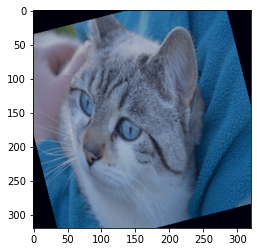

In [14]:
imshow_loader(train_data[1479][0])
# 훈련 데이터 고양이(1479~) 첫번째 그림

In [15]:
# train, test에 대해 DataLoader 정의

trainloader_animal10 = torch.utils.data.DataLoader(
    train_data,
    batch_size = 32,      # 일반적으로 batch size = 16, 32
    shuffle=True,         # train dataloader는 epoch마다 데이터 다시 섞어서 batch 만들고 학습! - 학습 효율 up
    num_workers=2
)

In [16]:
testloader_animal10 = torch.utils.data.DataLoader(
    test_data,
    batch_size = 32,      # 일반적으로 batch size = 16, 32
    shuffle=False,        # test dataloader는 데이터 매번 섞을 이유가 없음 - 어차피 확인 용도
    num_workers=2
)

In [17]:
print(len(trainloader_animal10), len(testloader_animal10))
# 18331/32 = 573
# 7848/32  = 246

573 246


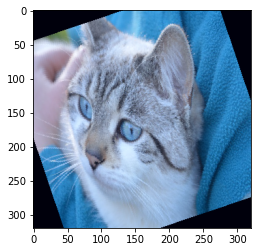

In [18]:
centercrop = torchvision.transforms.CenterCrop(320)

cat_1_reshape = centercrop(train_data[1479][0])
imshow_loader(cat_1_reshape)

In [19]:
# dataloader의 iteration 하나만 가져와서 확인해보자
tmploader_animal10 = torch.utils.data.DataLoader(test_data, batch_size = 4, shuffle=True)
dataiter = iter(tmploader_animal10)
images, labels = dataiter.next()

In [20]:
images.shape # 4개 img

torch.Size([4, 3, 320, 320])

In [21]:
labels.shape # 4개 label

torch.Size([4])

In [22]:
# test dataloader의 첫 batch 확인
def imshow_loader(img):
    img = img * 0.225 + 0.456 # 정확한 값은 아니지만 대강 normalize 반대로
    img_np = np.array(img)
    imshow(np.transpose(img_np, (1,2,0)))
    plt.show()

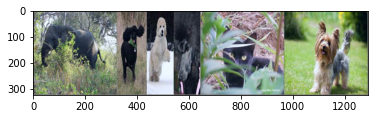

elephant dog   cat   dog  


In [23]:
imshow_loader(torchvision.utils.make_grid(images))
print(' '.join(f'{file_list[labels[j]]:5s}' for j in range(4)))

In [24]:
### Model 클래스 정의 - 차원에 유의하자!
# 10개의 클래스를 분류해야 하는 꽤나 복잡한 task - 모델 구조를 어느 정도로 복잡하게 짜볼까?
# 가장 마지막 Linear의 out_features는 얼마로 해야할까?
import torch.nn as nn

In [26]:
#### 모델 정의 시 유념해야할 건 각 층의 결과물의 차원!
#### 모델이 복잡해지면 복잡해질수록 이는 더욱 중요해지므로 레이어별로 도출되는 데이터의 크기를 써넣는 것을 추천 (안맞으면 에러남)
# (해당 모델은 임의로 만든 모델로 성능을 보장하지 X)

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        ##### Layer 정의 #####
        self.layer = nn.Sequential(
            # 맨처음 RGB 채널 3개이므로 가장 처음 in_channels = 3
            # img의 가장 첫 차원이 batch_size 값은 계속해서 유지
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=6),            # [batch_size,3,320,320] -> [batch_size,16,315,315] -> same with? - using 16 filters
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=17, stride=2), # [batch_size,16,300,300] -> [batch_size,32,150,150]
            nn.ReLU(),
            nn.Dropout(0.2), # 0.2 확률로 Dropout
            nn.MaxPool2d(kernel_size=12, stride=2),                               # [batch_size,32,140,140] -> [batch_size,32,70,70]
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=15, padding=2),# [batch_size,32,70,70] -> [batch_size,32,60,60] -> padding*2 주의!
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=11),           # [batch_size,32,60,60] -> [batch_size,32,50,50]
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2),                                # [batch_size,32,25,25] -> [batch_size,32,25,25]
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=11),          # [batch_size,32,25,25] -> [batch_size,32,15,15]
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=2), # [batch_size,32,7,7] -> [batch_size,32,7,7]
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(32*7*7,100),                                                # [batch_size,32*7*7] -> [batch_size,100]
            nn.ReLU(),
            nn.Linear(100,10)
        )

    def forward(self, x):
        # forward pass 과정
        out = self.layer(x)
        out = out.view(out.size(0),-1)  # FC layer에 들어가기전, flatten! - view 함수 활용
                                        # 가장 첫 차원인 batch_size는 유지하고 나머지 차원들을 하나로 합치기 - [batch_size,16,5,5] -> [batch_size,16*5*5]
        out = self.fc_layer(out)
        return out

In [27]:
# torchsummary로 모델 차원 어떻게 나오는지 돌려보기
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
# 모델 구조 파악할 수 있는 torchsummary의 summary 함수
# 전체적인 구조, param 개수, 용량 등 확인할 수 있음
# 이게 잘나와야 CNN 모델 차원 알맞게 정의한것 - 차원 맞지 않다면 여기서 에러뜸

from torchsummary import summary
test_model = MyModel() # 모델 객체 선언
test_model.to("cuda")
summary(test_model, (3,320,320), batch_size=32) # Recall) Tensor는 C, H, W 순서로 이미지 가짐

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 16, 315, 315]           1,744
              ReLU-2         [32, 16, 315, 315]               0
            Conv2d-3         [32, 32, 150, 150]         148,000
              ReLU-4         [32, 32, 150, 150]               0
           Dropout-5         [32, 32, 150, 150]               0
         MaxPool2d-6           [32, 32, 70, 70]               0
            Conv2d-7           [32, 32, 60, 60]         230,432
              ReLU-8           [32, 32, 60, 60]               0
            Conv2d-9           [32, 32, 50, 50]         123,936
             ReLU-10           [32, 32, 50, 50]               0
          Dropout-11           [32, 32, 50, 50]               0
        MaxPool2d-12           [32, 32, 25, 25]               0
           Conv2d-13           [32, 32, 15, 15]         123,936
             ReLU-14           [32, 32,

In [29]:
# Device 선언 (GPU 권장)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [30]:
# 모델 객체 선언
# to(device) : 모델을 device 위에서 돌릴거임
mymodel = MyModel().to(device)
mymodel

MyModel(
  (layer): Sequential(
    (0): Conv2d(3, 16, kernel_size=(6, 6), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(17, 17), stride=(2, 2))
    (3): ReLU()
    (4): Dropout(p=0.2, inplace=False)
    (5): MaxPool2d(kernel_size=12, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 32, kernel_size=(15, 15), stride=(1, 1), padding=(2, 2))
    (7): ReLU()
    (8): Conv2d(32, 32, kernel_size=(11, 11), stride=(1, 1))
    (9): ReLU()
    (10): Dropout(p=0.2, inplace=False)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(32, 32, kernel_size=(11, 11), stride=(1, 1))
    (13): ReLU()
    (14): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2))
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=1568, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [31]:
# loss func, optimizer 정의
criterion = nn.CrossEntropyLoss().to(device) # criterion (loss func)도 device 위에서
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001, weight_decay=0.0001) # 보통 Adam의 learning rate로 0.001 사용
                                                                                  # weight_decay = L2 Regularization의 lambda값 (가중치 제한 정도)

In [ ]:
# train 함수 정의
with torch.no_grad():
    for i, (inputs, targets) in enumerate(trainloader_animal10):
        inputs, targets = inputs.to(device), targets.to(device)
        print(inputs.shape)  # batch_size개의 이미지
        print(targets.shape) # batch_size개의 클래스

        outputs = mymodel(inputs)
        print(outputs.shape) # outputs는 32, 10 차원 (32개 data의 확률 10개씩)
        print(targets.shape) # targets는 32차원 (32개 data의 실제 클래스)

        loss = criterion(outputs, targets)  # -> cross entropy 식에 넣을때 이런 형태로 넣으면됨 (outputs, targets의 차원을 맞출 필요가 없음)
        print(loss.item())

        print(outputs.max(1)[1]) # 예측한 클래스
        print(targets) # 실제 클래스
        correct = (outputs.max(1)[1] == targets).sum().item() # 맞게 예측한 클래스 개수
        print(correct)
        break

torch.Size([32, 3, 320, 320])
torch.Size([32])
torch.Size([32, 10])
torch.Size([32])
2.333585500717163
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 7], device='cuda:0')
tensor([4, 1, 0, 8, 9, 6, 8, 9, 4, 8, 8, 7, 6, 8, 4, 4, 2, 3, 6, 9, 8, 8, 0, 3,
        8, 8, 8, 3, 4, 8, 0, 8], device='cuda:0')
0


In [32]:
# 추후 시각화를 위해 매 epoch마다 loss, accuracy 값을 저장할 리스트
# 이거 빼먹고 train 돌리면...
seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

In [33]:
def train(epoch):
    print(f'\n[ Train epoch: {epoch+1} ]')

    mymodel.train() # train은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하고 진행하기 위함

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, (inputs, targets) in enumerate(trainloader_animal10):
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어줘야됨
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = mymodel(inputs) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 100 == 99:
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 100 batches: {running_loss / 100}') # 이렇게 출력하는 것이 꼭 필요한 것은 아니지만, 중간중간 확인을 위해 매우 권장
            running_loss = 0.0

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', avg_loss)

In [34]:
# test 함수 정의
def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    mymodel.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in enumerate(testloader_animal10):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = mymodel(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)

In [37]:
# training
num_epoch = 5

In [38]:
# 연습 삼아 5 epoch만 진행
# 실제로 훈련할때는 올바른 epoch 설정 필요

for epoch in range(0, num_epoch):
    train(epoch)
    test(epoch)

# model 저장! - parameter값 저장
torch.save(mymodel.state_dict(), './mymodel_cifar10.pt')
print('Model Saved!')


[ Train epoch: 1 ]

Current batch: 100
Average train loss of recent 100 batches: 2.206630356311798

Current batch: 200
Average train loss of recent 100 batches: 2.2122711968421935

Current batch: 300
Average train loss of recent 100 batches: 2.2045941019058226

Current batch: 400
Average train loss of recent 100 batches: 2.2246015906333922

Current batch: 500
Average train loss of recent 100 batches: 2.209491500854492

Total train accuarcy: 18.45507610059462
Total train loss: 2.2111244420106497

[ Test epoch: 1 ]

Test accuarcy: 18.425076452599388
Test average loss: 2.212454699888462

[ Train epoch: 2 ]

Current batch: 100
Average train loss of recent 100 batches: 2.2165852546691895

Current batch: 200
Average train loss of recent 100 batches: 2.2144465255737305

Current batch: 300
Average train loss of recent 100 batches: 2.2140816926956175

Current batch: 400
Average train loss of recent 100 batches: 2.213385908603668

Current batch: 500
Average train loss of recent 100 batches: 2.2

In [39]:
# loss, accuracy 추이 확인 with plt.plot
seq_train_loss

[2.222488133695113,
 2.2111244420106497,
 2.2110897408730072,
 2.210268636024435,
 2.2103353162502537,
 2.209671256013774]

In [51]:
seq_test_loss

[2.212454699888462,
 2.210301662363657,
 2.2092679957064187,
 2.2090012813971294,
 2.208867471877152]

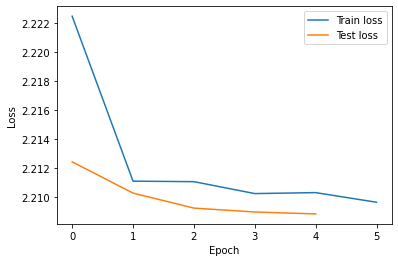

In [52]:
plt.plot(range(num_epoch+1), seq_train_loss, label="Train loss")
plt.plot(range(num_epoch+0), seq_test_loss, label="Test loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [41]:
seq_train_acc

[18.12230647536959,
 18.45507610059462,
 18.373247504227812,
 18.52053897768807,
 18.08411979706508,
 18.111395995854018]

In [45]:
seq_test_acc

[18.425076452599388,
 18.577981651376145,
 18.577981651376145,
 18.577981651376145,
 18.577981651376145]

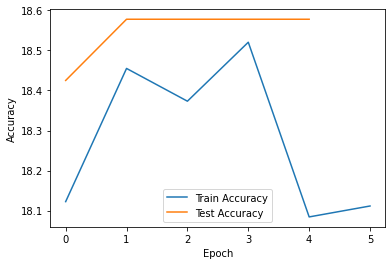

In [47]:
plt.plot(range(num_epoch+1), seq_train_acc, label="Train Accuracy")
plt.plot(range(num_epoch), seq_test_acc, label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()